In [180]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import trimmed_var
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted

In [181]:
df = pd.read_csv("SCFP2019.csv")

In [182]:
mask = df['HBUS'] == 1
df_hbus = df[mask]

In [183]:
df_hbus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7915 entries, 35 to 28884
Columns: 357 entries, YY1 to NINCQRTCAT
dtypes: float64(158), int64(199)
memory usage: 21.6 MB


In [184]:
assetcat = df_hbus['ASSETCAT'].unique()
print(assetcat)

[6 5 4 3 2 1]


In [185]:
assetcat_dict = {
    1: "0-20",
    2: "20-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100"
}
assetcat = df_hbus['ASSETCAT'].replace(assetcat_dict)
assetcat.head()

35    90-100
36    90-100
37    90-100
38    90-100
39    90-100
Name: ASSETCAT, dtype: object

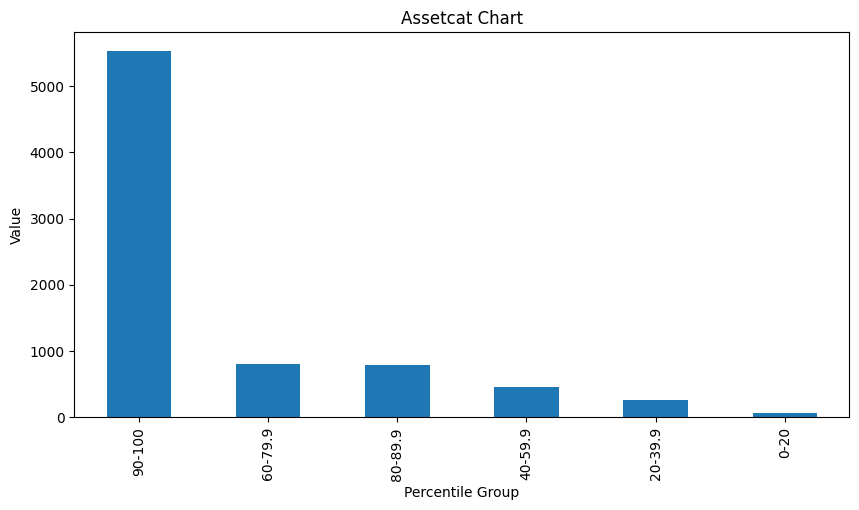

In [186]:
assetcat_value_count = assetcat.value_counts()
plt.figure(figsize=(10,5))
assetcat_value_count.plot(kind='bar',
                          xlabel='Percentile Group',
                          ylabel='Value',
                          title='Assetcat Chart'
                         )
plt.show()

In [187]:
hhd = df_hbus['HDEBT']
print(hhd)

35       1
36       1
37       1
38       1
39       1
        ..
28880    1
28881    1
28882    1
28883    1
28884    1
Name: HDEBT, Length: 7915, dtype: int64


In [188]:
hhd_dict = {
    0: "NO",
    1: "YES"
}
hhd = df_hbus['HDEBT'].replace(hhd_dict)
hhd.head()

35    YES
36    YES
37    YES
38    YES
39    YES
Name: HDEBT, dtype: object

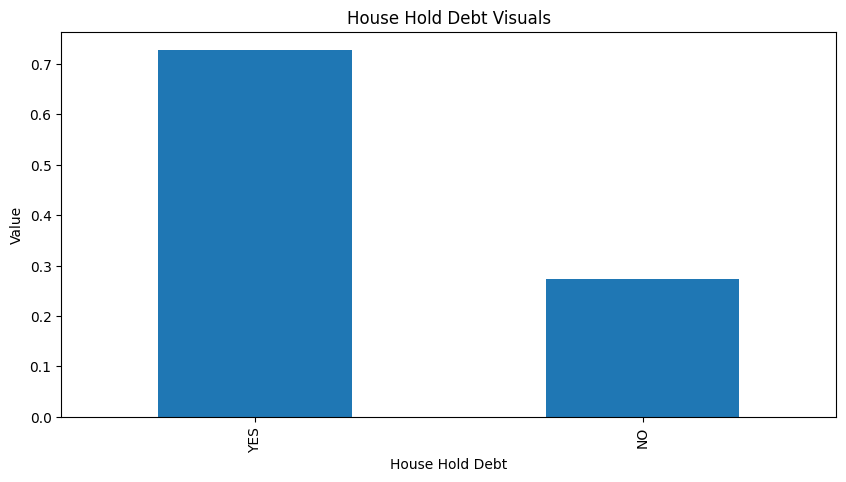

In [189]:
hhd_value_counts = hhd.value_counts(normalize=True)
plt.figure(figsize=(10,5))
hhd_value_counts.plot(kind='bar',
                      xlabel='House Hold Debt',
                      ylabel='Value',
                      title='House Hold Debt Visuals'
                     )
plt.show()

In [190]:
late_debt = df['LATE']
print(late_debt)

0        0
1        0
2        0
3        0
4        0
        ..
28880    0
28881    0
28882    0
28883    0
28884    0
Name: LATE, Length: 28885, dtype: int64


In [191]:
late_debt_dict = {
    0: "NO",
    1: "YES"
}
late_debt = df['LATE'].replace(late_debt_dict)
late_debt.head()

0    NO
1    NO
2    NO
3    NO
4    NO
Name: LATE, dtype: object

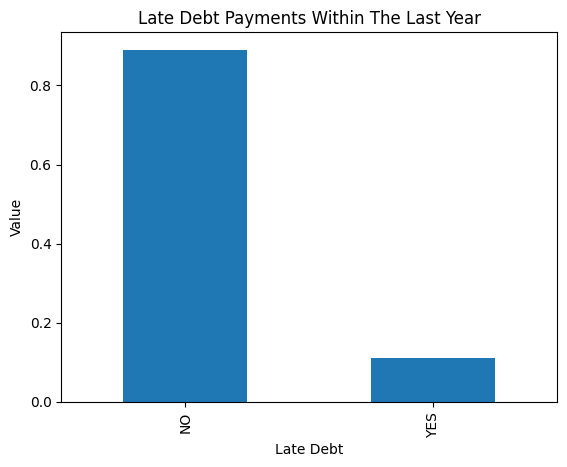

In [192]:
late_debt_value_counts = late_debt.value_counts(normalize=True)
late_debt_value_counts.plot(kind='bar',
                            xlabel='Late Debt',
                            ylabel='Value',
                            title='Late Debt Payments Within The Last Year'
                           )
plt.show()

In [193]:
inncat = df_hbus['INCCAT']
print(inncat)

35       6
36       6
37       6
38       6
39       6
        ..
28880    6
28881    6
28882    6
28883    6
28884    6
Name: INCCAT, Length: 7915, dtype: int64


In [194]:
incatt_dict = {
    1: "0-20", 
    2: "20-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100"
}
incatt = df_hbus['INCCAT'].replace(incatt_dict)
incatt.head()

35    90-100
36    90-100
37    90-100
38    90-100
39    90-100
Name: INCCAT, dtype: object

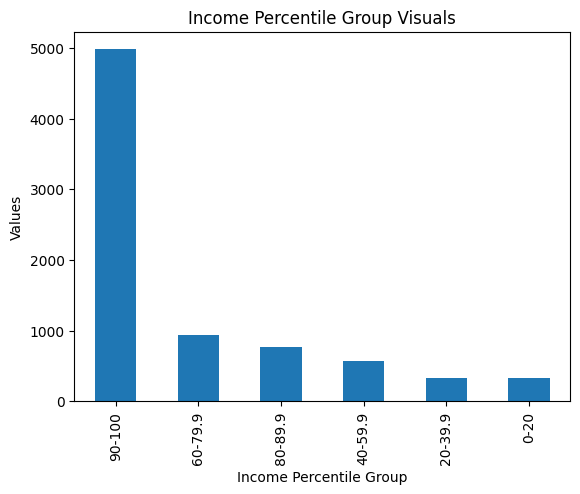

In [195]:
incatt_value_counts = incatt.value_counts()
incatt_value_counts.plot(kind='bar',
                         xlabel='Income Percentile Group',
                         ylabel='Values',
                         title='Income Percentile Group Visuals'
                        )
plt.show()

In [196]:
df_inccat = (df['INCCAT'].replace(incatt_dict).groupby(df['HBUS']).value_counts(normalize=True).rename('Frequency').to_frame().reset_index())
df_inccat

,HBUS,INCCAT,Frequency
0,0,0-20,0.210348
1,0,20-39.9,0.198140
2,0,40-59.9,0.189080
3,0,60-79.9,0.186600
4,0,90-100,0.117167
5,0,80-89.9,0.098665
6,1,90-100,0.629438
7,1,60-79.9,0.119015
8,1,80-89.9,0.097410
9,1,40-59.9,0.071510


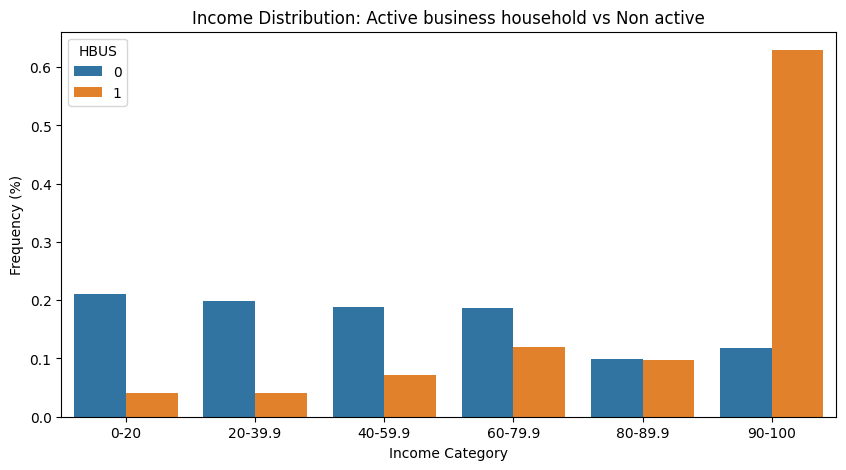

In [197]:
plt.figure(figsize=(10,5))
sns.barplot(
x= 'INCCAT',
y='Frequency',
hue='HBUS',
data=df_inccat,
order = incatt_dict.values()
)
plt.xlabel ("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Active business household vs Non active");
plt.show()

In [198]:
nwcat = df_hbus['NWCAT']
print(nwcat)

35       5
36       5
37       5
38       5
39       5
        ..
28880    5
28881    5
28882    5
28883    5
28884    5
Name: NWCAT, Length: 7915, dtype: int64


In [199]:
nwcat_dict = {
    1: "0-24.9",
    2: "25-49.9",
    3: "50-74.9",
    4: "75-89.9",
    5: "90-100"
}
nwcat = df_hbus['NWCAT'].replace(nwcat_dict)
nwcat.head()

35    90-100
36    90-100
37    90-100
38    90-100
39    90-100
Name: NWCAT, dtype: object

In [200]:
corr = ['KGINC', 'ASSET', 'SPENDLESS', 'INCOME', 'EQUITY']

In [201]:
df[corr].corr()

,KGINC,ASSET,SPENDLESS,INCOME,EQUITY
KGINC,1.000000,0.393897,0.006085,0.938120,0.679488
ASSET,0.393897,1.000000,0.057890,0.622440,0.641597
SPENDLESS,0.006085,0.057890,1.000000,0.025689,0.041778
INCOME,0.938120,0.622440,0.025689,1.000000,0.746567
EQUITY,0.679488,0.641597,0.041778,0.746567,1.000000


In [202]:
df_hbus[corr].corr()

,KGINC,ASSET,SPENDLESS,INCOME,EQUITY
KGINC,1.000000,0.395480,0.006941,0.941076,0.696901
ASSET,0.395480,1.000000,0.088787,0.615344,0.628681
SPENDLESS,0.006941,0.088787,1.000000,0.036372,0.055561
INCOME,0.941076,0.615344,0.036372,1.000000,0.754733
EQUITY,0.696901,0.628681,0.055561,0.754733,1.000000


In [203]:
X = df_hbus[['KGINC', 'INCOME']]

In [204]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7915 entries, 35 to 28884
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KGINC   7915 non-null   float64
 1   INCOME  7915 non-null   float64
dtypes: float64(2)
memory usage: 185.5 KB


In [205]:
model =  KMeans(n_clusters=3, random_state=30)
model.fit(X)

KMeans(n_clusters=3, random_state=30)

In [206]:
labels = model.labels_

In [207]:
centroids = model.cluster_centers_

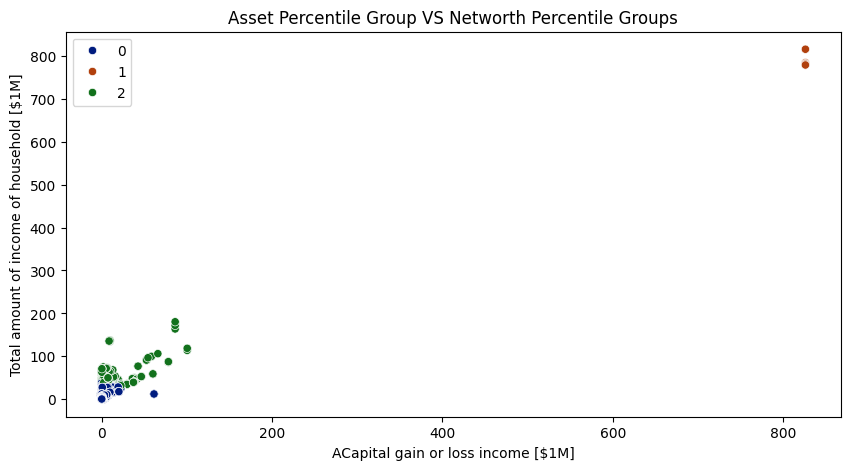

In [208]:
plt.figure(figsize=(10, 5))  

sns.scatterplot(  
    x=df_hbus['KGINC'] / 1e6,  
    y=df_hbus['INCOME'] / 1e6,  
    hue=labels,  
    palette='dark'  
)  

plt.xlabel("ACapital gain or loss income [$1M]")  
plt.ylabel("Total amount of income of household [$1M]")  
plt.title("Asset Percentile Group VS Networth Percentile Groups")  

plt.show()

Text(0.5, 1.0, 'Capital gain or loss income VS Total Amount Of Income Of Householdt')

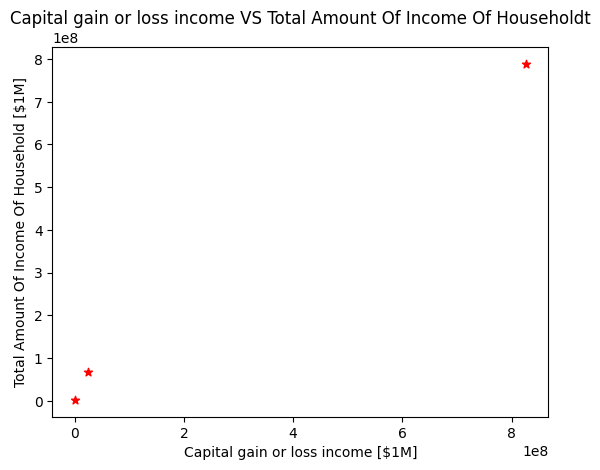

In [210]:
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='*')
plt.xlabel("Capital gain or loss income [$1M]")
plt.ylabel("Total Amount Of Income Of Household [$1M]")
plt.title("Capital gain or loss income VS Total Amount Of Income Of Householdt")

Text(0.5, 1.0, 'Capital gain or loss income VS Total Amount Of Income Of Household ')

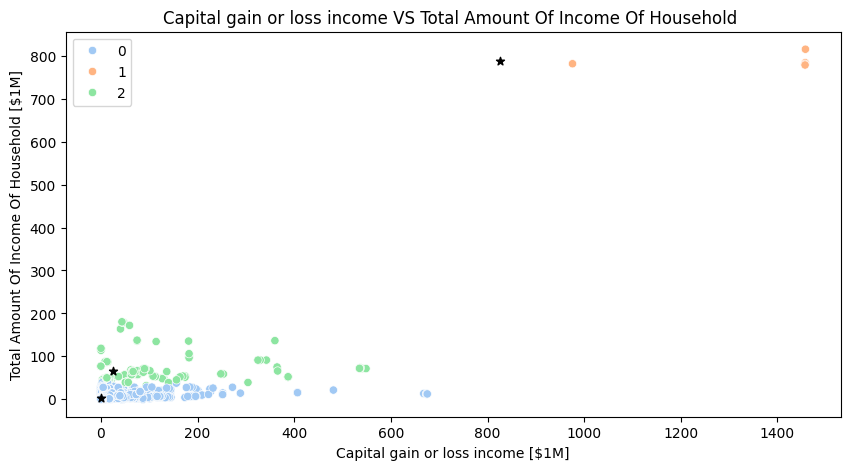

In [209]:
plt.figure(figsize=(10, 5))

sns.scatterplot(
    x=df_hbus['EQUITY'] / 1e6,
    y=df_hbus['INCOME'] / 1e6,
    hue=labels,
    palette='pastel'
)

plt.scatter(
    centroids[:, 0] / 1e6,
    centroids[:, 1] / 1e6,
    color='black',
    marker='*'
)

plt.xlabel("Capital gain or loss income [$1M]")
plt.ylabel("Total Amount Of Income Of Household [$1M]")
plt.title("Capital gain or loss income VS Total Amount Of Income Of Household ")

In [211]:
error = []
for n_clusters in range(1,21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=30)
    model.fit(X)
    error.append(model.inertia_)

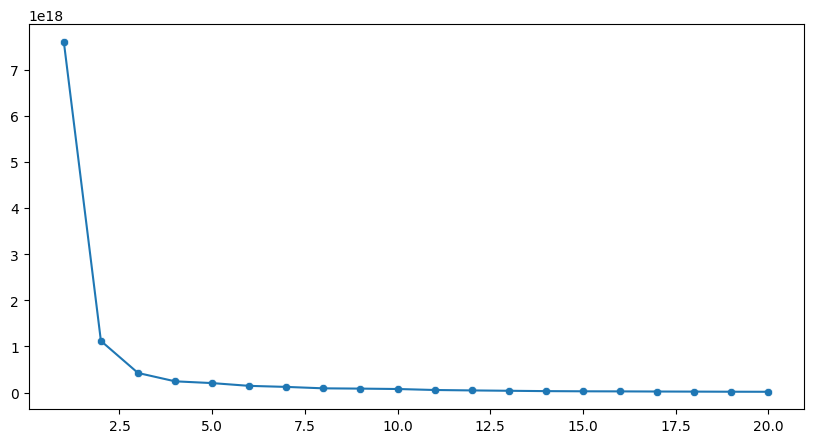

In [212]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 21), y=error)
sns.scatterplot(x=range(1, 21), y=error)
plt.show()

In [213]:
model = KMeans(init='k-means++',  
               n_clusters=5,  
               max_iter=500,  
               random_state=22)  

segments = model.fit_predict(X)

In [214]:
inertia = model.inertia_
print("inertia type:", type(inertia))
print("Inertia (3 clusters):", inertia)

inertia type: <class 'float'>
Inertia (3 clusters): 1.7941994636669005e+17


In [215]:
from sklearn.metrics import silhouette_score

In [216]:
ss = silhouette_score(X, model.labels_)
print("ss type:", type(ss))
print ("Silhouette Score (3 clusters):", ss)

ss type: <class 'numpy.float64'>
Silhouette Score (3 clusters): 0.8441008162162558


In [217]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = range(2, 12)
inertia_errors = []
silhouette_scores = []

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=30)
    model.fit(X)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, model.labels_))

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

inertia_errors type: <class 'list'>
inertia_errors len: 10
Inertia: [1.1197171140957737e+18, 4.2480495608227514e+17, 2.436381326304548e+17, 2.0526396501673104e+17, 1.451465804358188e+17, 1.2266281264110213e+17, 9.167636794382698e+16, 8.562531026011192e+16, 7.718772806942912e+16, 5.563039101580786e+16]

silhouette_scores type: <class 'list'>
silhouette_scores len: 10
Silhouette Scores: [np.float64(0.9948535088675357), np.float64(0.9409180252176103), np.float64(0.9176619285864176), np.float64(0.9155213655521501), np.float64(0.8365119574514089), np.float64(0.8372976254605243), np.float64(0.7690322628790519), np.float64(0.7666221056026373), np.float64(0.7673134667996817), np.float64(0.7666842306667669)]


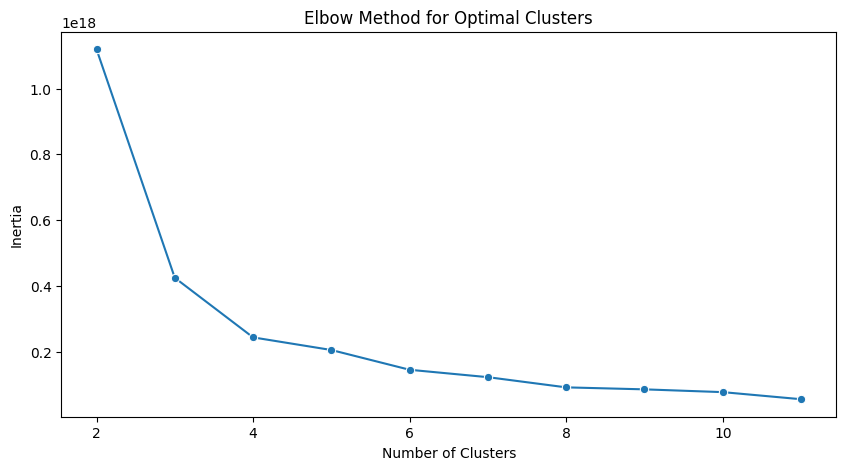

In [218]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=n_clusters, y=inertia_errors, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

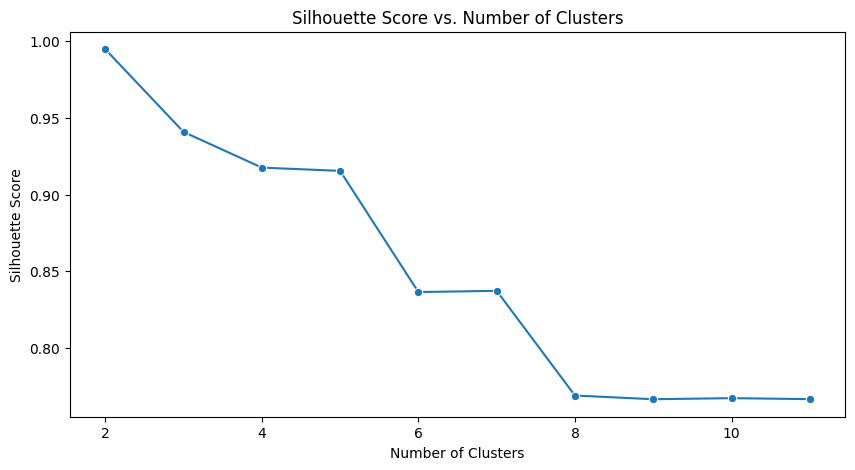

In [219]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=n_clusters, y=silhouette_scores, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

In [221]:
final_model = KMeans(n_clusters=5, random_state=42)
print("final_model type:", type(final_model))

final_model.fit(X)

final_model type: <class 'sklearn.cluster._kmeans.KMeans'>


KMeans(n_clusters=5, random_state=42)

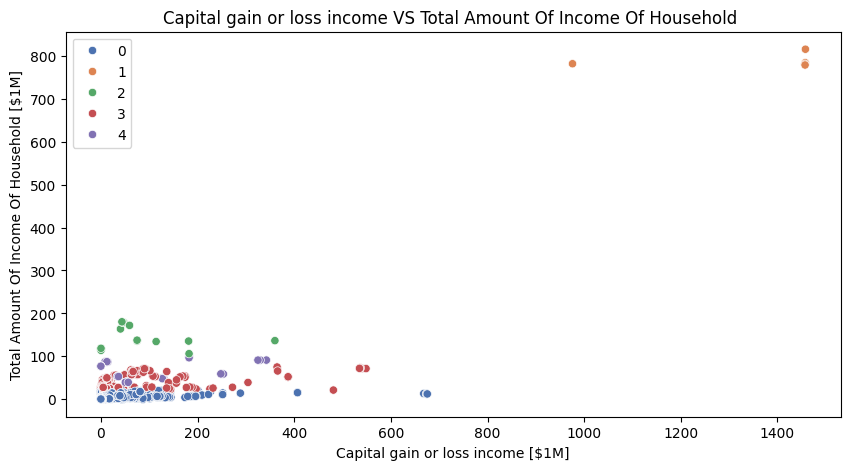

In [222]:
new_labels = final_model.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_hbus['EQUITY'] / 1e6, 
                y=df_hbus['INCOME'] / 1e6, 
                hue=new_labels, 
                palette='deep')

plt.xlabel("Capital gain or loss income [$1M]")
plt.ylabel("Total Amount Of Income Of Household [$1M]")
plt.title("Capital gain or loss income VS Total Amount Of Income Of Household ")
plt.show()

In [223]:
xgb = X.groupby(final_model.labels_).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)

xgb

xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (5, 2)


,KGINC,INCOME
0,3.037179e+05,1.703822e+06
1,8.261732e+08,7.882802e+08
2,6.526252e+07,1.404045e+08
3,6.884021e+06,4.133457e+07
4,5.210373e+07,6.175318e+07


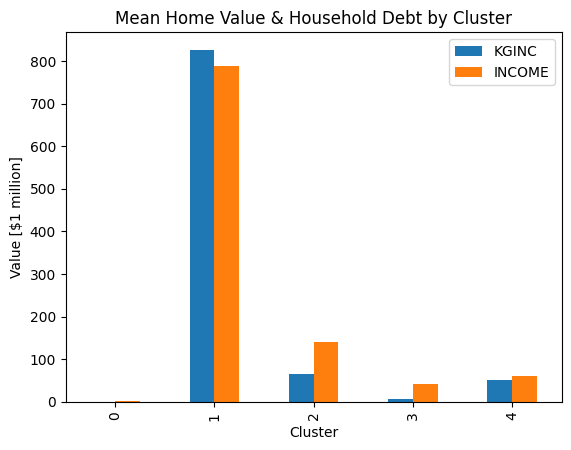

In [224]:
(xgb / 1e6).plot(kind='bar')

plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster")
plt.show()

In [225]:
data = df_hbus.var().sort_values(ascending=False).head(10)
data

ASSET       2.841118e+16
NETWORTH    2.782079e+16
NHNFIN      2.261656e+16
NFIN        1.749791e+16
BUS         1.494841e+16
KGTOTAL     1.318380e+16
KGBUS       1.137641e+16
ACTBUS      1.058917e+16
FIN         4.648479e+15
NMMF        2.669420e+15
dtype: float64

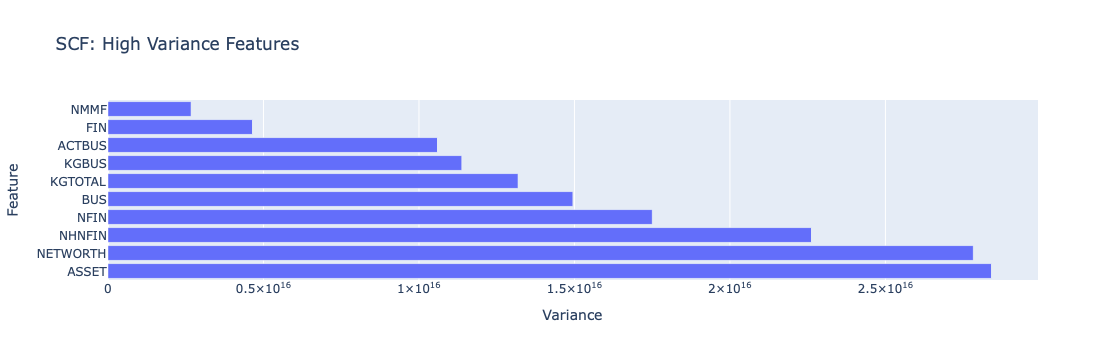

In [226]:
import plotly.express as px

fig = px.bar(
    x=data.values, 
    y=data.index, 
    orientation='h',
    labels={'x': 'Variance', 'y': 'Feature'}, 
    title='SCF: High Variance Features'
)

fig.show()

In [227]:
mask =  df_hbus['NETWORTH'] < 2e6
df_hbus_new = df_hbus[mask]
df_hbus_new.shape

(2720, 357)

In [228]:
data = df_hbus_new.var().sort_values().tail(10)
print(data)

HOUSES      8.609825e+10
FIN         8.705403e+10
ACTBUS      9.602532e+10
BUS         9.790490e+10
KGBUS       1.159216e+11
KGTOTAL     1.454122e+11
NHNFIN      1.896591e+11
NFIN        2.648653e+11
NETWORTH    2.874521e+11
ASSET       3.919638e+11
dtype: float64


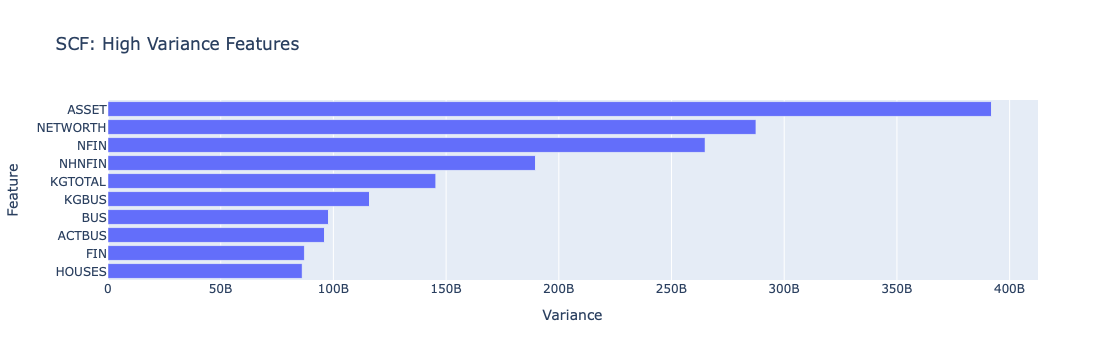

In [229]:
import plotly.express as px

fig = px.bar(
    x=data.values, 
    y=data.index, 
    orientation='h',
    labels={'x': 'Variance', 'y': 'Feature'}, 
    title='SCF: High Variance Features'
)

fig.show()

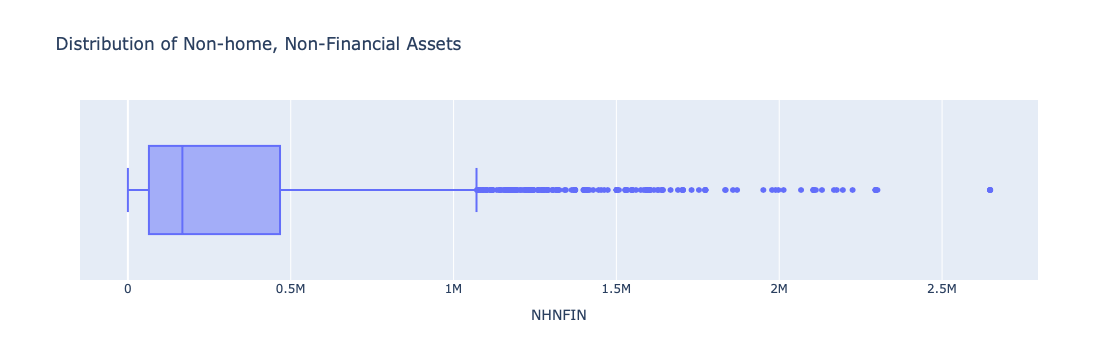

In [230]:
fig = px.box(
    df_hbus_new,
    x='NHNFIN',
    labels={'N-NFIN': 'Value [$]'},
    title= 'Distribution of Non-home, Non-Financial Assets'
)
fig.show()

In [231]:
from scipy.stats.mstats import trimmed_var

In [232]:
top_ten_trim_var = df_hbus_new.apply(trimmed_var).sort_values().tail(10)
print("top_ten_trin_var type:", type(top_ten_trim_var))
print("top_ten_trim_var shape:", top_ten_trim_var.shape)
print(top_ten_trim_var)

top_ten_trin_var type: <class 'pandas.core.series.Series'>
top_ten_trim_var shape: (10,)
DEBT        1.647622e+10
ACTBUS      2.044453e+10
BUS         2.105621e+10
KGTOTAL     2.241863e+10
FIN         2.321486e+10
HOUSES      3.153619e+10
NHNFIN      6.087074e+10
NFIN        1.021714e+11
NETWORTH    1.525170e+11
ASSET       1.878290e+11
dtype: float64


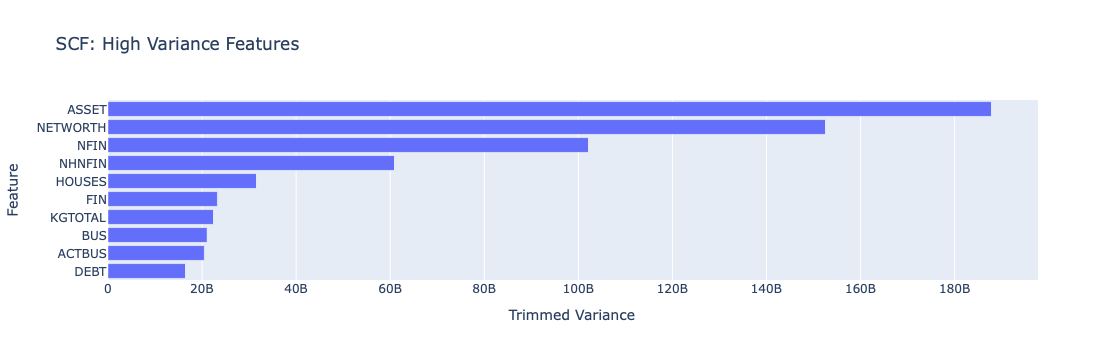

In [233]:
fig = px.bar(
    x=top_ten_trim_var.values, 
    y=top_ten_trim_var.index, 
    orientation='h',
    labels={'x': 'Trimmed Variance', 'y': 'Feature'}, 
    title='SCF: High Variance Features'
)

fig.show()

In [234]:
high_var_cols = top_ten_trim_var.tail(5).index.to_list()
print ("high_var_cols type:", type(high_var_cols))
print("high_var_cols len:"
, len(top_ten_trim_var))
high_var_cols

high_var_cols type: <class 'list'>
high_var_cols len: 10


['HOUSES', 'NHNFIN', 'NFIN', 'NETWORTH', 'ASSET']

In [235]:
X = df_hbus_new[high_var_cols]

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (2720, 5)


,HOUSES,NHNFIN,NFIN,NETWORTH,ASSET
80,579602.64901,301001.55074,839264.63576,275427.17881,939651.81457
81,579602.64901,299657.79382,838105.43046,274267.97351,938492.60927
82,579602.64901,301001.55074,839264.63576,275427.17881,939651.81457
83,579602.64901,298314.03689,836946.22517,271949.56291,937333.40397
84,579602.64901,299657.79382,838105.43046,275427.17881,938492.60927


In [236]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add "for Loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model = make_pipeline(StandardScaler(),
                          KMeans(n_clusters=k, random_state=42))
    model.fit(X)
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    silhouette_scores.append(silhouette_score(X, model.named_steps['kmeans'].labels_))


print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print ("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)


inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [6450.529715447274, 4744.980939180514, 3933.720629489421, 3351.742664941548, 2969.607800898641, 2622.0252953442796, 2289.696698715545, 1991.4297609868263, 1854.14914656781, 1702.2065475882853, 1594.7767822502362]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [np.float64(0.5428550664905931), np.float64(0.44662505072043596), np.float64(0.4139391977666059), np.float64(0.3309227678255733), np.float64(0.33785961512223284), np.float64(0.3267785811293886), np.float64(0.3356101980836651), np.float64(0.33755850815893856), np.float64(0.32916695574529503), np.float64(0.34302219776875614), np.float64(0.3447213199544547)]


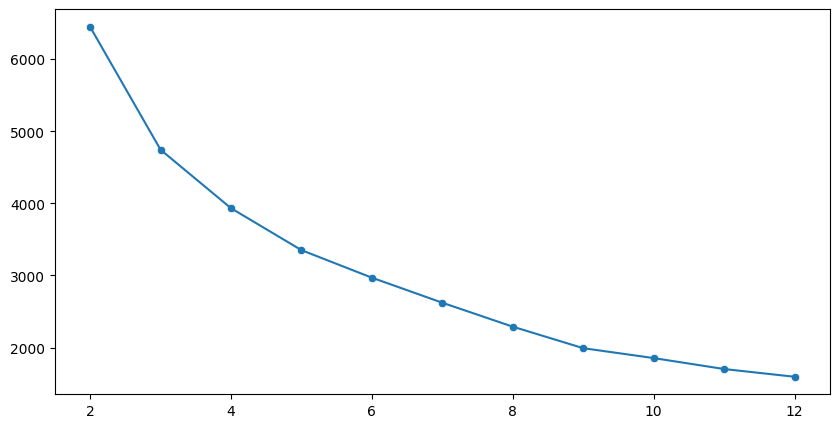

In [237]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=n_clusters, y=inertia_errors)
sns.scatterplot(x=n_clusters, y=inertia_errors)
plt.show()


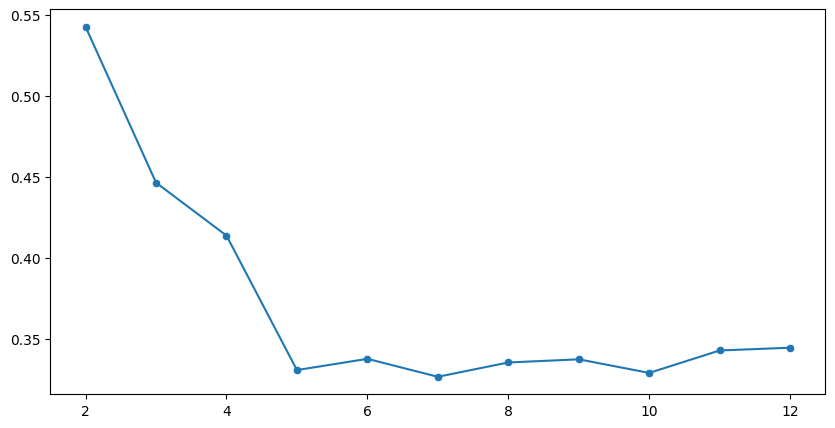

In [238]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=n_clusters, y=silhouette_scores)
sns.scatterplot(x=n_clusters, y=silhouette_scores)
plt.show()


In [239]:
final_model = make_pipeline(StandardScaler(), KMeans(n_clusters=4, random_state=42))
print("final_model type:", type(final_model))

final_model.fit(X)

final_model type: <class 'sklearn.pipeline.Pipeline'>


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [240]:
labels = final_model.named_steps['kmeans'].labels_
labels [:5]

array([2, 2, 2, 2, 2], dtype=int32)

In [241]:
centroids = final_model.named_steps['kmeans'].cluster_centers_
print ("centroids type:", type (centroids) )
print("centroids shape:", centroids. shape)
centroids

centroids type: <class 'numpy.ndarray'>
centroids shape: (4, 5)


array([[-0.5371821 , -0.53081961, -0.69376153, -0.75077914, -0.7635732 ],
       [ 0.33021226,  2.32165813,  1.88304413,  1.53099451,  1.53412097],
       [ 0.23916245,  0.04420493,  0.16862599,  0.36517267,  0.32442506],
       [ 2.05995297,  0.08670826,  1.23776568,  1.35511775,  1.576726  ]])

In [242]:
xgb = X.groupby(labels).mean()
print ("xgb type:", type(xgb) )
print ("xgb shape:", xgb.shape)
xgb 

xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (4, 5)


,HOUSES,NHNFIN,NFIN,NETWORTH,ASSET
0,137898.423776,1.238698e+05,2.447559e+05,2.305349e+05,3.353756e+05
1,392366.849793,1.365892e+06,1.570667e+06,1.453673e+06,1.773629e+06
2,365655.469749,3.742462e+05,6.885027e+05,8.287375e+05,1.016414e+06
3,899822.762537,3.927529e+05,1.238635e+06,1.359395e+06,1.800298e+06


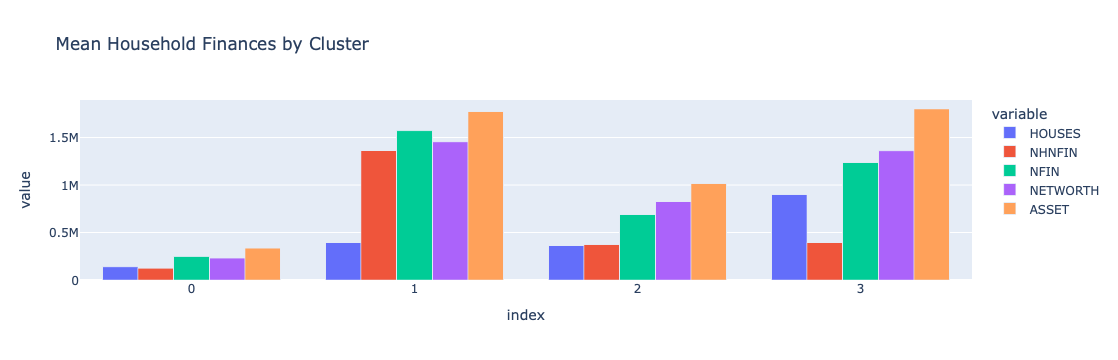

In [243]:
fig = px.bar(
    xgb,
    barmode= 'group',
    labels={'x': 'Cluster', 'y': 'Value [$]'}, 
    title='Mean Household Finances by Cluster')
fig.show()

In [244]:
pca = PCA(n_components=2, random_state=42)
# Transform 'X"
X_t = pca.fit_transform(X)
#Put Xt into DataFrame
X_pca = pd.DataFrame(X_t, columns= ['PC1', 'PC2' ])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca. shape)
X_pca.head()

X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (2720, 2)


,PC1,PC2
0,47600.090960,-119662.415792
1,45301.812092,-120387.644469
2,47600.090960,-119662.415792
3,42426.319930,-120927.739120
4,45879.025388,-120572.778502


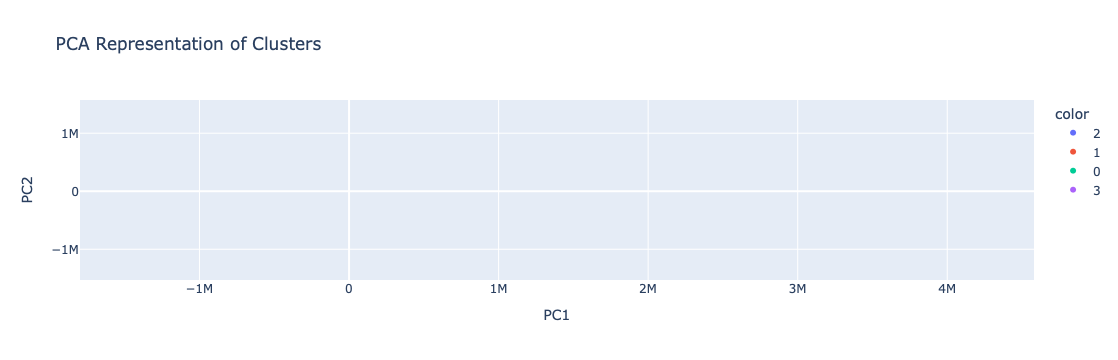

In [245]:
fig = px.scatter (
data_frame=X_pca, 
    x= 'PC1',
    y= 'PC2',
    color=labels.astype(str),
    title='PCA Representation of Clusters', labels={'x': 'PC1', 'y': 'PC2'}
)
fig.show()